**Euler Solver**

We will begin by creating a code to solve differential equations with no matrix and vector. We will than adapt our code to accept matrices instead of simply number.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg

def Euler_method(f, y0, t):
    '''Approximate solution using Euler_method
    Parameters
    -----------------------------------
    f : function that we want to solve
    y0 : initial condition
    t : Période d'évaluation (array)
    -----------------------------------
    Return : numpy array
    '''
    y = np.zeros(len(t))
    y[0] = y0
    for i in range(1, len(t)):
        delta_t = t[i] - t[i-1]
        y[i] = y[i-1] + (delta_t * f(y[i-1], t[i-1]))
    return y

With $y'=y$ and $y(0)=1$. We know that the solution is : $y=e^x$

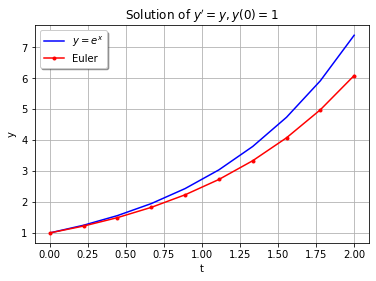

In [3]:
t = np.linspace(0,2,10)
y0 = 1
f = lambda y,t: y
y = Euler_method(f,y0,t)
y_true = np.exp(t)
plt.plot(t, y_true, "b-", label=r"$y=e^x$")
plt.plot(t, y, "r.-", label="Euler")
plt.legend(fancybox=True, shadow=True)
plt.grid(True)
plt.xlabel("t")
plt.ylabel("y")
plt.title(r"Solution of $y'=y , y(0)=1$")
plt.show()

With $y' = y^2$ and $y(0)=-1$. We already know that the solution is : $y=\frac{-1}{t+1}$

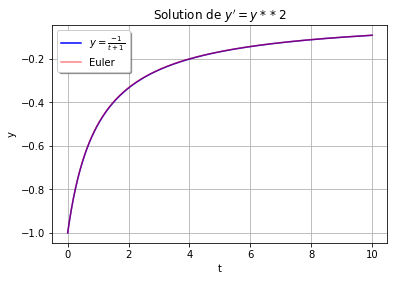

In [24]:
t = np.linspace(0,10,1000)
y0 = -1
f = lambda y,t: y**2
y = Euler_method(f, y0, t)
y_true = -1/(t+1)

plt.plot(t, y_true, "b-", label=r"$y=\frac{-1}{t+1}$")
plt.plot(t, y, "r-", alpha=0.5, label="Euler")
plt.legend(fancybox=True, shadow=True)
plt.grid(True)
plt.xlabel("t")
plt.ylabel("y")
plt.title(r"Solution de $y'=y**2$")
plt.show()


Here, the red line is directly above the blue line.

We will now use Euler method with Matrices and vectors. Let's begin with $\dot{\vec{x}}=\mathbf{A}\vec{x}$. 

With : ${\vec{x}}$ = $[x_1, x_2, x_3 ... x_n]^T$ : matrix $n \times 1$, $\mathbf{A} = 2n \times 2n$

Let $n=2$. We now have a matrix $\vec{x} \rightarrow 2\times 1$ and a matrix $\mathbf{A} \rightarrow 2\times 2$. We therefore have :
- $\dot{x} = f(x,y)$
- $\dot{y} = g(x,y)$

$\dot{[x(t), y(t)]^T} = \mathbf{A} [x(t),y(t)]^T \Rightarrow \dot{[x(t), y(t)]^T} = e^{\mathbf{A}t}[x(0), y(0)]^T$ 

Let $\mathbf{A}$ be a random matrix $[[0.58, -0.24],[1.47, -1.04]]$ and $[x(0), y(0)]^T = [1,1]$

To apply Euler's method, we find the solution at a certain point with : $\dot{[x(t), y(t)]^T} = e^{\mathbf{A}\Delta t}[x(0), y(0)]^T$

We have for solutions :

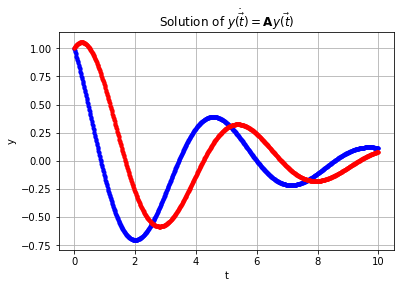

In [5]:
matrix = np.array([[0.58, -0.24], [1.47, -1.04]])
linalg.expm(matrix * 4) #matrix * temps

# Calculer e^A*t pour les différentes incrémentations de temps. Multiplier par la matrice des CI. Plotter le tout.

def EDO_Euler_matrix(IC, t, A):
    '''Approximate solution using Euler method parameters for matrices
    -----------------------------
    IC : initial condition
    t : time period
    A : Matrix
    -----------------------------
    Return tuple
    '''
    n = len(IC)  # We estimage te size of our matrices
    res = []
    for i in range(n):
        res.append(np.zeros((len(t),1)))  # We initialize zero matrices
        res[i][0] = IC[i]  #We initialize our initial value
    previous = IC
    
    for j in range(1, len(t)):
        delta_t = t[j] - t[j-1]
        matrix = np.matmul(linalg.expm(A * delta_t), previous)  #find solution
        previous = matrix
        for i, y in enumerate(res):
            res[i][j] = matrix[i]  #redefine value
    return res



t = np.linspace(0, 10, 1000)
A = np.array([[0.58, -1.47], [1.47, -1.04]])
y1 = (EDO_Euler_matrix(IC=np.array([[1],[1]]), t=t, A=A))[0]
y2 = (EDO_Euler_matrix(IC=np.array([[1],[1]]), t=t, A=A))[1]

plt.plot(t, y1, "b.-", label="y1")
plt.plot(t, y2, "r.-", label="y2")
plt.grid(True)
plt.xlabel("t")
plt.ylabel("y")
plt.title(r"Solution of $\dot{\vec{y(t)}}=\mathbf{A}\vec{y(t)}$")
plt.show()


We can now optimize our codes ... We will use a different methods. Instead of using two loop for, we will instead create a matrix $n \times m$ where $n$ is the number of equations in our system and $m$ is the number of step we have. By doing so, we can reduce the computing time by removing one loop for 

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg


def EDO_Euler_Matrix_Opti(IC, t, A):
    n = len(IC)
    m = len(t)
    res = np.zeros((n, m))
    res[:,0] = IC  #Setting our initial conditions
    for i in range(1, m):
        delta_t = t[i] - t[i-1]
        res[:,i] = np.matmul(linalg.expm(A * delta_t), res[:,(i-1)])
    return res

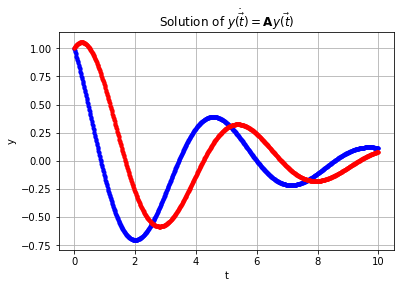

In [7]:
t = np.linspace(0, 10, 1000)
A = np.array([[0.58, -1.47], [1.47, -1.04]])
IC = np.array([1, 1]).T
y1 = (EDO_Euler_Matrix_Opti(IC=IC, t=t, A=A))[0]
y2 = (EDO_Euler_Matrix_Opti(IC=IC, t=t, A=A))[1]

plt.plot(t, y1, "b.-", label="y1")
plt.plot(t, y2, "r.-", label="y2")
plt.grid(True)
plt.xlabel("t")
plt.ylabel("y")
plt.title(r"Solution of $\dot{\vec{y(t)}}=\mathbf{A}\vec{y(t)}$")
plt.show()


We have the same result ... perfect! It's now time to try with random matrices for fun! We can now work with 3x3 matrices (or more) ... why not!

[[ 0.01465246  1.71340665 -0.62888037]
 [ 0.35787689 -0.43570517  1.73139843]
 [ 2.2268065  -1.9161367  -1.23906785]]


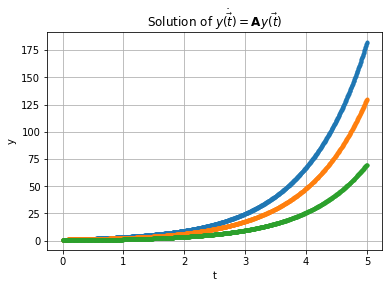

In [8]:
t = np.linspace(0,5,1000)
IC = np.array([1, 1, 1]).T
A = np.random.randn(3,3)
A = 1.5 * A  # We increase the variance
print(A)
for y in EDO_Euler_Matrix_Opti(t=t, IC=IC, A=A):
    plt.plot(t, y, ".-")

plt.grid(True)
plt.xlabel("t")
plt.ylabel("y")
plt.title(r"Solution of $\dot{\vec{y(t)}}=\mathbf{A}\vec{y(t)}$")
plt.show()


By playing with code further up, we can clearly see how sensible is our graphic when we change the variance! We we increase the $\sigma$ of our random matrix $\mathbf{A}$ and diverge.

*Fun Fact : while calculating our matrices, we haven't work with eigenvalues which seems strange. However, we work indirectly with them when we raise $e$ to the power of $\mathbf{A}$. We can convince ourself whit this relation : $\exp{M} = V \Lambda V^{-1}$ where $\Lambda$ is our eigenvalues matrix*

**Runge Kutta method**

We find the value of $\vec{y}$ at a time $t+1$ with this formula :

$\vec{y}_{t+1} = \vec{v}_t +\frac{\Delta t}{6}(\vec{k}_1 + 2\vec{k}_2 + 2\vec{k}_3 + \vec{k}_4)$

With the following values of $k$ :
- $\vec{k}_1 = \vec{G}(\vec{y}_t, t_i)$
- $\vec{k}_2 = \vec{G}(\vec{y}_t + \frac{\vec{k}_1 \Delta t}{2}, t_i + \frac{\Delta t}{2})$
- $\vec{k}_3 = \vec{G}(\vec{y}_t + \frac{\vec{k}_2 \Delta t}{2}, t_i + \frac{\Delta t}{2})$
- $\vec{k}_4 = \vec{G}(\vec{y}_t + k_3 \Delta t, t_i + \Delta t)$

Let's begin by applying RK in 1D. We will then adapt our code to accept matrices. For now, we have:

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv


def RK4_1D(t, y0, dydx):
    '''Approximate differential equation using Runge Kutter method.
    --------------------
    t : time array
    y0 : initial condition
    dydx : function
    --------------------
    Return np.array
    '''
    m = len(t)   #estimate number of iterations
    dt = (t[-1] - t[0])/m   #finding our time step dt
    x0 = 0   #In our case, we set x0=0. Can be change if needed.
    y = np.zeros(m)
    y[0] = y0

    for i in range(1, m):
        k1 = dt * dydx(t[i-1], y[i-1])
        k2 = dt * dydx(t[i-1] + 0.5 * dt, y[i-1] + 0.5 * k1)
        k3 = dt * dydx(t[i-1] + 0.5 * dt, y[i-1] + 0.5 * k2)
        k4 = dt * dydx(t[i-1] + dt, y[i-1] + k3)
        y[i] = y[i-1] + (k1 + 2*k2 + 2*k3 + k4)/6
    
    return y

Let's try with the same example we took with Euler's method. For instance, let's consider $y'=y$ with $y(0) = 1$. We already know the answer is $y=e^{x}$ :

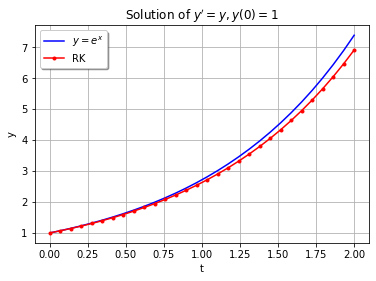

In [10]:
def dydx(t, y):
    return y  # This is saying y' = y. We could have done f = lambda y,t : y ... exactly the same

t = np.linspace(0,2,30)
y0 = np.array([1])
y = RK4_1D(y0=y0,t=t, dydx=dydx)
y_true = np.exp(t)
plt.plot(t, y_true, "b-", label=r"$y=e^x$")
plt.plot(t, y, "r.-", label="RK")
plt.legend(fancybox=True, shadow=True)
plt.grid(True)
plt.xlabel("t")
plt.ylabel("y")
plt.title(r"Solution of $y'=y , y(0)=1$")
plt.show()

The RK model seems to work ... wonderful! Now let's look at a more complex equation. We consider :

$y' = -x \times y^2$ with $y(0) = 1$. The solution is therefore $y(x) = \frac{2}{2 + x^2}$

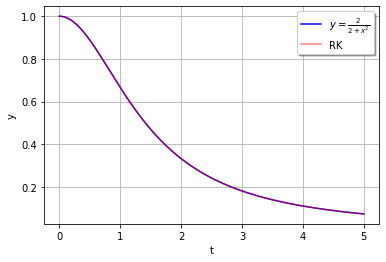

In [25]:
def dydx(t, y):
    return (-t * y**2)

t = np.linspace(0, 5, 1000)
y0 = np.array([1])
y = RK4_1D(t=t, y0=y0, dydx=dydx)
y_true = 2/(2+t**2)
plt.plot(t, y_true, "b-", label=r"$y=\frac{2}{2+x^2}$")
plt.plot(t, y, "r-", alpha=0.5, label="RK")
plt.grid(True)
plt.legend(shadow=True, fancybox=True)
plt.xlabel("t")
plt.ylabel("y")
plt.show()

We will now consider RK with matrices. We need to adapt our code:

In [12]:
def dydx(t,y,A):
    return np.matmul(A, y)

def RK4(t, IC, dydx, A):
    '''Approximate differential equation with RK methods for matrices
    -----------------------
    t : time array
    IC : initial condition (in array)
    dydx : function
    A : random matrix
    '''
    n = len(IC)
    m = len(t)
    res = np.zeros((n, m))   #nxm matrix that contain our values
    res[:,0] = IC  # First column is redefine
    dt = (t[-1] - t[0])/m
    for i in range(1, m):
        k1 = dt * dydx(t[i-1], res[:,(i-1)], A=A)
        k2 = dt * dydx(t[i-1] + 0.5 * dt, res[:,(i-1)] + 0.5 * k1, A=A)
        k3 = dt * dydx(t[i-1] + 0.5 * dt, res[:,(i-1)] + 0.5 * k2, A=A)
        k4 = dt * dydx(t[i-1] + dt, res[:,(i-1)] + k3, A=A)
        res[:,i] = res[:,i-1] + (k1 + 2*k2 + 2*k3 + k4)/6
    
    return res


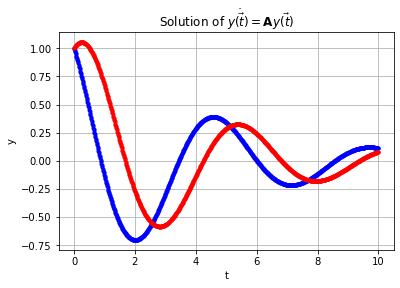

In [13]:
t = np.linspace(0, 10, 1000)
A = np.array([[0.58, -1.47], [1.47, -1.04]])
IC = np.array([1,1]).T
y = (RK4(IC=IC, t=t, A=A, dydx=dydx))
y1 = y[0]
y2 = y[1]

plt.plot(t, y1, "b.-", label="y1")
plt.plot(t, y2, "r.-", label="y2")
plt.grid(True)
plt.xlabel("t")
plt.ylabel("y")
plt.title(r"Solution of $\dot{\vec{y(t)}}=\mathbf{A}\vec{y(t)}$")
plt.show()


**Using NUMBA to reduce our computing time**

For now, applying NUMBA to Euler method for solving $\vec{y} = \mathbf{A}\vec{y}$ is not very feasable. NUMBA is really good at accelerating loop for. However, NUMBA is unable to work with scipy.linalg.expm() ... Therefore, it is impossible to accelerate our loop for. The only place we can apply NUMBA is for the calculation of the $\Delta t$.

Nonetheless, we can apply NUMBA to the RK method. What we can see is that NUMBA is really good when working with "big" computation time. We also need to modify our code to make them more efficient to compile for NUMBA. Let's compare :

- First : with numba
- Second : without numba

We use matrix 2x2 with 2 000 000 increments from 0 to 2 seconds

In [67]:
import time
from numba import njit

In [ ]:
@njit
def dydx(t,y,A):
    return A @ y   #NUMBA can't work with np.matmul()

@njit
def RK4(t, IC, dydx, A):
    '''Approximate differential equation with RK methods for matrices
    -----------------------
    t : time array
    IC : initial condition (in array)
    dydx : function
    A : random matrix
    '''
    n = len(IC)
    m = len(t)
    res = np.zeros((n, m))   #nxm matrix that contain our values
    res[:,0] = IC  # First column is redefine
    dt = (t[-1] - t[0])/m
    for i in range(1, m):
        k1 = dt * dydx(t[i-1], res.T[(i-1)], A=A)
        k2 = dt * dydx(t[i-1] + 0.5 * dt, res.T[(i-1)] + 0.5 * k1, A=A)
        k3 = dt * dydx(t[i-1] + 0.5 * dt, res.T[(i-1)] + 0.5 * k2, A=A)
        k4 = dt * dydx(t[i-1] + dt, res.T[(i-1)] + k3, A=A)
        res.T[i] = res.T[i-1] + (k1 + 2*k2 + 2*k3 + k4)/6
    
    return res

start = time.time()

IC = np.array([1, 2], dtype=np.float64).T
t = np.linspace(0, 2, 2000000, dtype=np.float64)
A = np.array([[1, 2],[3, 4]], dtype=np.float64)

RK4(t=t, IC=IC, A=A, dydx=dydx)
plt.plot(t, y1, "b.-", label="y1")
plt.plot(t, y2, "r.-", label="y2")
plt.grid(True)
plt.xlabel("t")
plt.ylabel("y")
plt.title(r"Solution of $\dot{\vec{y(t)}}=\mathbf{A}\vec{y(t)}$")
plt.show()
end = time.time()

This test took arround 11 seconds. A warning message appear because NUMBA has to index our matrix. For now, let's try the same code without NUMBA to compare

57.21222257614136


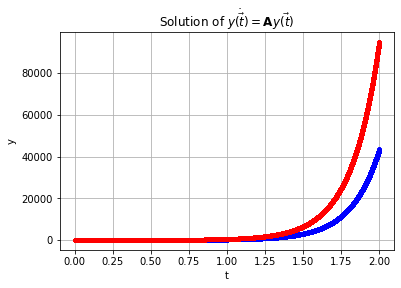

In [95]:
def dydx(t,y,A):
    return A @ y

def RK4(t, IC, dydx, A):
    '''Approximate differential equation with RK methods for matrices
    -----------------------
    t : time array
    IC : initial condition (in array)
    dydx : function
    A : random matrix
    '''
    n = len(IC)
    m = len(t)
    res = np.zeros((n, m))   #nxm matrix that contain our values
    res[:,0] = IC  # First column is redefine
    dt = (t[-1] - t[0])/m
    for i in range(1, m):
        k1 = dt * dydx(t[i-1], res[:,(i-1)], A=A)
        k2 = dt * dydx(t[i-1] + 0.5 * dt, res[:,(i-1)] + 0.5 * k1, A=A)
        k3 = dt * dydx(t[i-1] + 0.5 * dt, res[:,(i-1)] + 0.5 * k2, A=A)
        k4 = dt * dydx(t[i-1] + dt, res[:,(i-1)] + k3, A=A)
        res[:,i] = res[:,i-1] + (k1 + 2*k2 + 2*k3 + k4)/6
    
    return res

start = time.time()

IC = np.array([1, 2], dtype=np.float64).T
t = np.linspace(0, 2, 2000000, dtype=np.float64)
A = np.array([[1, 2],[3, 4]], dtype=np.float64)

y = RK4(t=t, IC=IC, A=A, dydx=dydx)
end = time.time()
print(end-start)
y1, y2 = y[0], y[1]
plt.plot(t, y1, "b.-", label="y1")
plt.plot(t, y2, "r.-", label="y2")
plt.grid(True)
plt.xlabel("t")
plt.ylabel("y")
plt.title(r"Solution of $\dot{\vec{y(t)}}=\mathbf{A}\vec{y(t)}$")
plt.show()

We can clearly see how faster is NUMBA here. Also, we can slightly reduce our computing time (and removing our warning message) by creating a $m \times n$ matrix rather than a $n \times m$. By doing so, we don't index on columns. Our "new" code is :

12.746423959732056


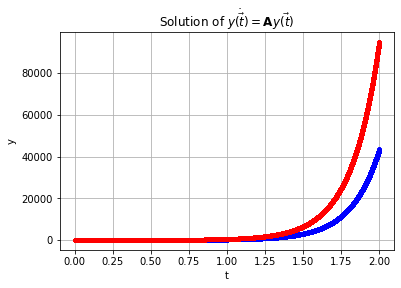

In [156]:
@njit
def dydx(t,y,A):
    return A @ y

@njit
def RK4(t, IC, dydx, A):
    '''Approximate differential equation with RK methods for matrices
    -----------------------
    t : time array
    IC : initial condition (in array -> line)
    dydx : function
    A : random matrix
    '''
    n = len(IC)
    m = len(t)
    res = np.zeros((m, n))   #nxm matrix that contain our values
    res[0] = IC  # First line is redefine
    dt = (t[-1] - t[0])/m
    for i in range(1, m):
        k1 = dt * dydx(t[i-1], res[(i-1)], A=A)
        k2 = dt * dydx(t[i-1] + 0.5 * dt, res[(i-1)] + 0.5 * k1, A=A)
        k3 = dt * dydx(t[i-1] + 0.5 * dt, res[(i-1)] + 0.5 * k2, A=A)
        k4 = dt * dydx(t[i-1] + dt, res[(i-1)] + k3, A=A)
        res[i] = res[i-1] + (k1 + 2*k2 + 2*k3 + k4)/6
    
    return res

IC = np.array([1, 2], dtype=np.float64)
t = np.linspace(0, 2, 2000000, dtype=np.float64)
A = np.array([[1, 2],[3, 4]], dtype=np.float64)

start = time.time()

y = RK4(t=t, IC=IC, A=A, dydx=dydx)

end = time.time()
print(end-start)

y1 = y[:,0]
y2 = y[:,1]
plt.plot(t, y1, "b.-", label="y1")
plt.plot(t, y2, "r.-", label="y2")
plt.grid(True)
plt.xlabel("t")
plt.ylabel("y")
plt.title(r"Solution of $\dot{\vec{y(t)}}=\mathbf{A}\vec{y(t)}$")
plt.show()

Finally, let's try to obtain a "big" computing time by using a big matrix.

In [176]:
start = time.time()
IC = np.array([1] * 1000, dtype=np.float64)
t = np.linspace(0, 1, 1000, dtype=np.float64)
A = np.array(np.random.randn(1000,1000), dtype=np.float64)

(RK4(t=t, IC=IC, A=A, dydx=dydx))
end = time.time()
print(end-start)

2.0650582313537598
